# Regressão, classificação e treinamento do Dataframe

In [198]:
# importing python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [199]:
# Leitura do dataframe com dados meteorológicos e de processo
dados_df = pd.read_excel("dataframe.xlsx")

#Index do dataframe
dados_df.set_index('Data fim', inplace = True)
dados_df.head()

,SO2,H2S,AT,RH,WS,WD,TQ-41001.VZ.AF,TI413001,V-48001.DN.AF,V-48002.DN.AF,...,TI975005B,TI975006B,TI975007B,TI975008B,TI975009B,TI975010B,PV-210467A-AF,PV-350573B-AF,PV-350548-AF,FI110417
Data fim,,,,,,,,,,,,,,,,,,,,,
2019-11-17 23:00:00,4.91,3.38,27.01,78.2,0.74,133.84,37.729744,49.047598,0.037591,-10.987031,...,477.050384,745.102218,999.892449,721.494542,999.695149,1001.188216,0.0,4.242181,0.0,0.0
2019-11-17 22:00:00,4.99,3.29,27.60,77.3,1.35,126.44,28.859774,48.233776,0.325231,-10.521327,...,460.051308,829.444045,999.897398,717.398489,999.712433,1001.176935,0.0,5.307805,0.0,0.0
2019-11-17 21:00:00,4.88,3.44,28.05,77.3,2.11,128.37,21.059136,48.282328,0.109776,-10.817968,...,454.933822,992.667686,999.890582,708.586570,999.727098,1001.196622,0.0,4.975173,0.0,0.0
2019-11-17 20:00:00,4.97,3.27,28.00,78.3,1.43,124.06,16.974692,48.602862,0.307604,-10.446259,...,458.856722,956.878314,999.926554,724.849580,999.752503,1001.230881,0.0,4.986596,0.0,0.0
2019-11-17 19:00:00,4.61,2.78,28.12,76.6,1.48,109.42,14.180825,49.397138,0.554110,-10.450843,...,449.303777,705.124821,999.977633,751.196580,999.779296,1001.259548,0.0,5.964566,0.0,0.0


## Correlação das variáveis metereologicas e de processo

In [200]:
target_v = dados_df["H2S"]          #Target Variable
feature_m = dados_df.drop("H2S",1)  #Feature Matrix

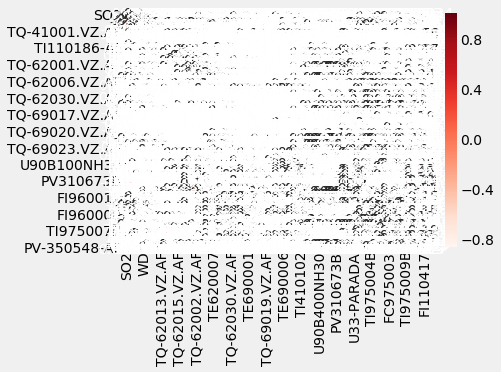

In [201]:
# Usando correlação de Pearson

cor = dados_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [202]:
# Correlação com a variável de saída
cor_target = abs(cor["H2S"])

In [203]:
# Valores das correlacões
relevant_features = cor_target[cor_target>0.2].sort_values(ascending=False)
relevant_features

H2S             1.000000
WS              0.426691
TE620710        0.397967
TI975009B       0.391076
FI970008        0.375552
PV-280088-AF    0.316929
FI960006        0.316840
TE620007        0.311551
RH              0.307772
U90B400NH30     0.302608
FI960008        0.301585
U90B100NH30     0.277064
AT              0.262009
TI975005B       0.241497
TE620714        0.241342
TE690006        0.235867
TI975007B       0.228290
WD              0.216441
FC975002        0.210367
Name: H2S, dtype: float64

## Random Forest com regressão para prever a variável H2S

In [204]:
# Convertir o DataFrame em Arrays para rodar o Random Forest

# Deletando a variável SO2 para entender melhor a influença no modelo das varíaveis de processo
dados_df = dados_df.drop('SO2', axis=1)

# Valores das variável H2S (Objetivo)
labels_h2s = np.array(dados_df['H2S'])

# Deletando os valores do H2S das features 
features = dados_df.drop('H2S', axis=1)

# Salvando os dados das features para usa-los mais na frente 
feature_list = list(features.columns)

#Convertendo a numpy array
features = np.array(features)

dados_df.head()

,H2S,AT,RH,WS,WD,TQ-41001.VZ.AF,TI413001,V-48001.DN.AF,V-48002.DN.AF,TQ-62013.VZ.AF,...,TI975005B,TI975006B,TI975007B,TI975008B,TI975009B,TI975010B,PV-210467A-AF,PV-350573B-AF,PV-350548-AF,FI110417
Data fim,,,,,,,,,,,,,,,,,,,,,
2019-11-17 23:00:00,3.38,27.01,78.2,0.74,133.84,37.729744,49.047598,0.037591,-10.987031,28.572820,...,477.050384,745.102218,999.892449,721.494542,999.695149,1001.188216,0.0,4.242181,0.0,0.0
2019-11-17 22:00:00,3.29,27.60,77.3,1.35,126.44,28.859774,48.233776,0.325231,-10.521327,28.601708,...,460.051308,829.444045,999.897398,717.398489,999.712433,1001.176935,0.0,5.307805,0.0,0.0
2019-11-17 21:00:00,3.44,28.05,77.3,2.11,128.37,21.059136,48.282328,0.109776,-10.817968,28.665422,...,454.933822,992.667686,999.890582,708.586570,999.727098,1001.196622,0.0,4.975173,0.0,0.0
2019-11-17 20:00:00,3.27,28.00,78.3,1.43,124.06,16.974692,48.602862,0.307604,-10.446259,28.696852,...,458.856722,956.878314,999.926554,724.849580,999.752503,1001.230881,0.0,4.986596,0.0,0.0
2019-11-17 19:00:00,2.78,28.12,76.6,1.48,109.42,14.180825,49.397138,0.554110,-10.450843,28.723238,...,449.303777,705.124821,999.977633,751.196580,999.779296,1001.259548,0.0,5.964566,0.0,0.0


In [205]:
# Dividendo os dados em dados de treinamento e teste
train_features, test_features, train_labels, test_labels = train_test_split(features, labels_h2s, test_size = 0.25, random_state = 42)

# Tamanho dos dados de treinamento e teste
print('Tamanho das features de treinamento:', train_features.shape)
print('Tamanho dos labels de treinamento:', train_labels.shape)
print('Tamanho das features de teste:', test_features.shape)
print('Tamanho dos labels de teste:', test_labels.shape)

Tamanho das features de treinamento: (11653, 84)
Tamanho dos labels de treinamento: (11653,)
Tamanho das features de teste: (3885, 84)
Tamanho dos labels de teste: (3885,)


## Treinando o modelo de regressão

In [206]:
# Inicializando o modelo com 1000 árvores de decisão
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Treinando o modelo com os dados de treinamento
rf.fit(train_features, train_labels);

In [207]:
# Usando o algoritmo Random Forest
predictions = rf.predict(test_features)

# Calculando os erros absolutos
errors = abs(predictions - test_labels)

# mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.48


## Importância das variáveis na predição de H2S



Importância ou contribuição relativa de cada variável na previsão de H2S. Esses valores ajudam a escolher as variáveis mais importantes e a eliminar as menos importantes para a construção do modelo.

In [208]:
# valor da importância das variáveis
importances = list(rf.feature_importances_)

# Lista de tuplas com variável e importância
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Ordenando as importâncias das variáveis
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Apresentando as variáveis e a importância 
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances];

Variável: FI970008             Importância: 0.26
Variável: TI975009B            Importância: 0.07
Variável: RH                   Importância: 0.04
Variável: WS                   Importância: 0.04
Variável: TE690001             Importância: 0.03
Variável: TE690019             Importância: 0.03
Variável: AT                   Importância: 0.02
Variável: TE690002             Importância: 0.02
Variável: FI960012             Importância: 0.02
Variável: TI975004B            Importância: 0.02
Variável: TI975010B            Importância: 0.02
Variável: WD                   Importância: 0.01
Variável: TQ-41001.VZ.AF       Importância: 0.01
Variável: TI413001             Importância: 0.01
Variável: V-48001.DN.AF        Importância: 0.01
Variável: V-48002.DN.AF        Importância: 0.01
Variável: TQ-62013.VZ.AF       Importância: 0.01
Variável: TE620027             Importância: 0.01
Variável: TI110186-AF          Importância: 0.01
Variável: TE620028             Importância: 0.01
Variável: TQ-62015.V

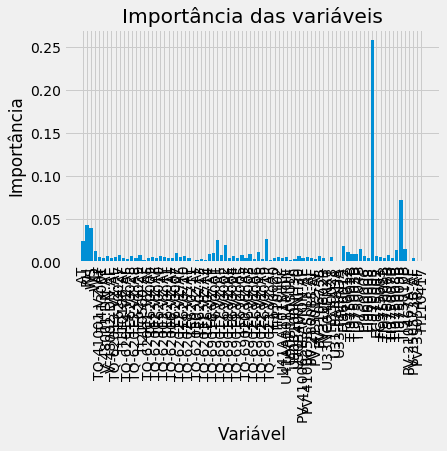

In [209]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importância'); plt.xlabel('Variável'); plt.title('Importância das variáveis');

## Random Forest para classificar em classes os dados do Dataframe 

Classificação do dataset de acordo com o nível de H2S

In [210]:
# Função para definir as classes dos dados

def classifier(row):        
    if row["H2S"] <= 1:
          return 1
    elif row["H2S"] <= 2:
          return 2
    elif row["H2S"] <= 3:
          return 3
    else:
          return 4

In [211]:
# Passando os dados à função
dados_df["class"] = dados_df.apply(classifier, axis=1)
dados_df.head()

,H2S,AT,RH,WS,WD,TQ-41001.VZ.AF,TI413001,V-48001.DN.AF,V-48002.DN.AF,TQ-62013.VZ.AF,...,TI975006B,TI975007B,TI975008B,TI975009B,TI975010B,PV-210467A-AF,PV-350573B-AF,PV-350548-AF,FI110417,class
Data fim,,,,,,,,,,,,,,,,,,,,,
2019-11-17 23:00:00,3.38,27.01,78.2,0.74,133.84,37.729744,49.047598,0.037591,-10.987031,28.572820,...,745.102218,999.892449,721.494542,999.695149,1001.188216,0.0,4.242181,0.0,0.0,4
2019-11-17 22:00:00,3.29,27.60,77.3,1.35,126.44,28.859774,48.233776,0.325231,-10.521327,28.601708,...,829.444045,999.897398,717.398489,999.712433,1001.176935,0.0,5.307805,0.0,0.0,4
2019-11-17 21:00:00,3.44,28.05,77.3,2.11,128.37,21.059136,48.282328,0.109776,-10.817968,28.665422,...,992.667686,999.890582,708.586570,999.727098,1001.196622,0.0,4.975173,0.0,0.0,4
2019-11-17 20:00:00,3.27,28.00,78.3,1.43,124.06,16.974692,48.602862,0.307604,-10.446259,28.696852,...,956.878314,999.926554,724.849580,999.752503,1001.230881,0.0,4.986596,0.0,0.0,4
2019-11-17 19:00:00,2.78,28.12,76.6,1.48,109.42,14.180825,49.397138,0.554110,-10.450843,28.723238,...,705.124821,999.977633,751.196580,999.779296,1001.259548,0.0,5.964566,0.0,0.0,3


In [212]:
# Valores da variável de saída
labels_cl = np.array(dados_df['class'])

# Deletando os valores do 'H2S' e 'class' das features
features = dados_df.drop('H2S', axis=1, inplace=True)
features = dados_df.drop('class', axis=1)

feature_list = list(features.columns)
features.head()

,AT,RH,WS,WD,TQ-41001.VZ.AF,TI413001,V-48001.DN.AF,V-48002.DN.AF,TQ-62013.VZ.AF,TE620027,...,TI975005B,TI975006B,TI975007B,TI975008B,TI975009B,TI975010B,PV-210467A-AF,PV-350573B-AF,PV-350548-AF,FI110417
Data fim,,,,,,,,,,,,,,,,,,,,,
2019-11-17 23:00:00,27.01,78.2,0.74,133.84,37.729744,49.047598,0.037591,-10.987031,28.572820,29.600000,...,477.050384,745.102218,999.892449,721.494542,999.695149,1001.188216,0.0,4.242181,0.0,0.0
2019-11-17 22:00:00,27.60,77.3,1.35,126.44,28.859774,48.233776,0.325231,-10.521327,28.601708,29.640401,...,460.051308,829.444045,999.897398,717.398489,999.712433,1001.176935,0.0,5.307805,0.0,0.0
2019-11-17 21:00:00,28.05,77.3,2.11,128.37,21.059136,48.282328,0.109776,-10.817968,28.665422,29.699544,...,454.933822,992.667686,999.890582,708.586570,999.727098,1001.196622,0.0,4.975173,0.0,0.0
2019-11-17 20:00:00,28.00,78.3,1.43,124.06,16.974692,48.602862,0.307604,-10.446259,28.696852,29.700001,...,458.856722,956.878314,999.926554,724.849580,999.752503,1001.230881,0.0,4.986596,0.0,0.0
2019-11-17 19:00:00,28.12,76.6,1.48,109.42,14.180825,49.397138,0.554110,-10.450843,28.723238,29.700001,...,449.303777,705.124821,999.977633,751.196580,999.779296,1001.259548,0.0,5.964566,0.0,0.0


In [213]:
#Convertendo a numpy array
features = np.array(features)

In [214]:
# Criando dados de treinamento e dados de teste
X_train, X_test, y_train, y_test = train_test_split(features, labels_cl, test_size = 0.25, random_state = 42)

In [215]:
# Tamanho dos dados de treinamento e teste
print('Tamanho das features de treinamento:', X_train.shape)
print('Tamanho dos labels de treinamento:', y_train.shape)
print('Tamanho das features de teste:', X_test.shape)
print('Tamanho dos labels de teste:', y_test.shape)

Tamanho das features de treinamento: (11653, 84)
Tamanho dos labels de treinamento: (11653,)
Tamanho das features de teste: (3885, 84)
Tamanho dos labels de teste: (3885,)


## Treinando o modelo de classificação

In [216]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Treinando o modelo com os dados de treinamento
clf.fit(X_train, y_train);

y_pred=clf.predict(X_test)

Precisão da classificação

In [217]:
# Accuracy
print("Precisão:",metrics.accuracy_score(y_test, y_pred))

Precisão: 0.7474903474903475


In [218]:
# Importância das variáveis
clf=RandomForestClassifier(n_estimators=1000)

# Treinando o modelo com os dados de treinamento
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
# Apresentando as variáveis com mais influença na classificação
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

FI970008         0.037718
TE620710         0.030834
TI975009B        0.027816
FI970012         0.027072
WS               0.025314
                   ...   
PV-210467A-AF    0.000642
U33-PARADA       0.000584
U31-PARADA       0.000554
FI110417         0.000183
U33NC04ENXT      0.000000
Length: 84, dtype: float64

No handles with labels found to put in legend.


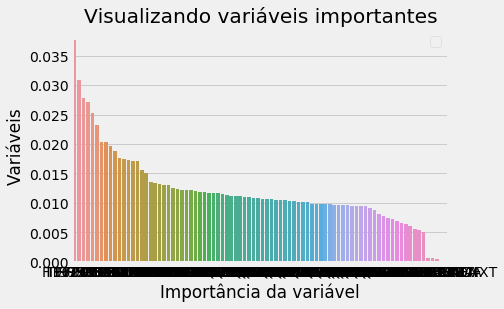

In [220]:
# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xlabel('Importância da variável')
plt.ylabel('Variáveis')
plt.title("Visualizando variáveis importantes")
plt.legend()
plt.show()

Matriz de confusão usando Random Forest com as metricas mais usadas para problemas de classificação

In [221]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1104  128    8    2]
 [ 223  618  153   15]
 [  31  157  569  131]
 [   6   25  102  613]]
              precision    recall  f1-score   support

           1       0.81      0.89      0.85      1242
           2       0.67      0.61      0.64      1009
           3       0.68      0.64      0.66       888
           4       0.81      0.82      0.81       746

    accuracy                           0.75      3885
   macro avg       0.74      0.74      0.74      3885
weighted avg       0.74      0.75      0.74      3885



## SVM (Support Vector Machine) para classificar em classes os dados do Dataframe

In [222]:
# Definindo um novo conjunto de dados de teste e treinamento
# X_train, X_test, y_train, y_test = train_test_split(features, labels_cl, test_size = 0.25)

# Tamanho dos dados de treinamento e teste
# print('Tamanho das features de treinamento:', X_train.shape)
# print('Tamanho dos labels de treinamento:', y_train.shape)
# print('Tamanho das features de teste:', X_test.shape)
# print('Tamanho dos labels de teste:', y_test.shape)

In [223]:
# Usando SVC de Scikit-Learn
# svclassifier = SVC(kernel='linear')

# Treinando o modelo
# svclassifier.fit(X_train, y_train)

In [224]:
# Predição 
# y_pred = svclassifier.predict(X_test)

Matriz de confusão usando SVM

In [225]:
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

## Random Forest com regressão para prever a variável H2S em T-1

In [226]:
# Convertindo o array de labels de H2S e features em dataframe
labels_h2s_df = pd.DataFrame(labels_h2s, columns = ['H2S'])
features_df = pd.DataFrame(features, columns = feature_list)

In [227]:
# Deletando o primeiro registro dos labels para desfazar o tempo em -1
labels_h2s_df.drop([0], axis=0, inplace=True)

# Deletando o último registro das features para desfazer o tempo em -1
features_df.drop(features_df.tail(1).index, axis=0, inplace=True)

In [228]:
# Convertindo os dataframes em T-1 em arrays para usa-los no modelo
labels_h2s_array = np.array(labels_h2s_df)
features_array = np.array(features_df)

In [229]:
# Dividendo os dados em dados de treinamento e teste
train_features, test_features, train_labels, test_labels = train_test_split(features_array, labels_h2s_array, test_size = 0.25, random_state = 42)

# Tamanho dos dados de treinamento e teste
print('Tamanho das features de treinamento:', train_features.shape)
print('Tamanho dos labels de treinamento:', train_labels.shape)
print('Tamanho das features de teste:', test_features.shape)
print('Tamanho dos labels de teste:', test_labels.shape)

Tamanho das features de treinamento: (11652, 84)
Tamanho dos labels de treinamento: (11652, 1)
Tamanho das features de teste: (3885, 84)
Tamanho dos labels de teste: (3885, 1)


## Treinando o modelo de regressão para prever a variável H2S em T-1

In [230]:
# Inicializando o modelo com 1000 árvores de decisão
rf_t1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Treinando o modelo com os dados de treinamento
rf_t1.fit(train_features, np.ravel(train_labels));

In [231]:
# valor da importância das variáveis
importances_t1 = list(rf_t1.feature_importances_)

# Lista de tuplas com variável e importância
feature_importances_t1 = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_t1)]

# Ordenando as importâncias das variáveis
feature_importances_t1 = sorted(feature_importances_t1, key = lambda x: x[1], reverse = True)

# Apresentando as variáveis e a importância 
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances_t1];

Variável: FI970008             Importância: 0.26
Variável: TI975006B            Importância: 0.06
Variável: FI960012             Importância: 0.03
Variável: RH                   Importância: 0.02
Variável: WS                   Importância: 0.02
Variável: TE690001             Importância: 0.02
Variável: TE690002             Importância: 0.02
Variável: TE690019             Importância: 0.02
Variável: TI975007B            Importância: 0.02
Variável: AT                   Importância: 0.01
Variável: WD                   Importância: 0.01
Variável: TQ-41001.VZ.AF       Importância: 0.01
Variável: TI413001             Importância: 0.01
Variável: V-48001.DN.AF        Importância: 0.01
Variável: V-48002.DN.AF        Importância: 0.01
Variável: TQ-62013.VZ.AF       Importância: 0.01
Variável: TE620027             Importância: 0.01
Variável: TQ-62014.VZ.AF       Importância: 0.01
Variável: TE620028             Importância: 0.01
Variável: TQ-62015.VZ.AF       Importância: 0.01
Variável: TE620029  

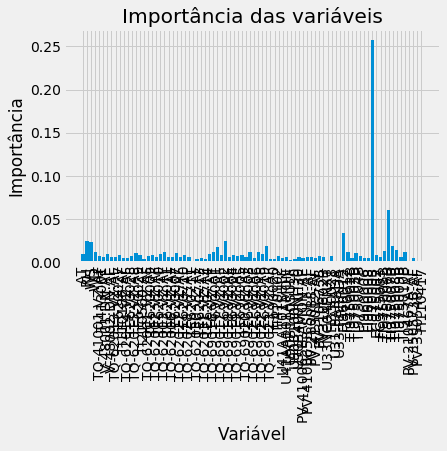

In [232]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances_t1)))

# Make a bar chart
plt.bar(x_values, importances_t1, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importância'); plt.xlabel('Variável'); plt.title('Importância das variáveis');

## Random Forest para classificar em classes os dados do Dataframe em T-1

In [233]:
# Convertindo o array de labels de H2S e features em dataframe
labels_cl_df = pd.DataFrame(labels_cl, columns = ['class'])

In [234]:
# Deletando o primeiro registro dos labels de class para desfazar o tempo em -1
labels_cl_df.drop([0], axis=0, inplace=True)

In [235]:
# Convertindo o dataframe em T-1 em arrays para usa-los no modelo
labels_cl_array = np.array(labels_cl_df)

In [236]:
# Dividendo os dados em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_cl_array, test_size = 0.25, random_state = 42)

# Tamanho dos dados de treinamento e teste
print('Tamanho das features de treinamento:', X_train.shape)
print('Tamanho dos labels de treinamento:', y_train.shape)
print('Tamanho das features de teste:', X_test.shape)
print('Tamanho dos labels de teste:', y_test.shape)

Tamanho das features de treinamento: (11652, 84)
Tamanho dos labels de treinamento: (11652, 1)
Tamanho das features de teste: (3885, 84)
Tamanho dos labels de teste: (3885, 1)


## Treinando o modelo de classificação em T-1

In [237]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Treinando o modelo com os dados de treinamento
clf.fit(X_train, np.ravel(y_train));

y_pred=clf.predict(X_test)

Precisão da classificação em T-1

In [238]:
# Accuracy
print("Precisão:",metrics.accuracy_score(y_test, y_pred))

Precisão: 0.7305019305019305


In [239]:
# Importância das variáveis em T-1
clf=RandomForestClassifier(n_estimators=1000)

# Treinando o modelo com os dados de treinamento
clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [240]:
# Apresentando as variáveis com mais influença na classificação em T-1
feature_imp_t1 = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp_t1

FI970008         0.036329
TE620710         0.032631
TI975009B        0.028034
FI970012         0.026610
FI960012         0.023305
                   ...   
U33-PARADA       0.000610
PV-210467A-AF    0.000589
U31-PARADA       0.000538
FI110417         0.000202
U33NC04ENXT      0.000000
Length: 84, dtype: float64

No handles with labels found to put in legend.


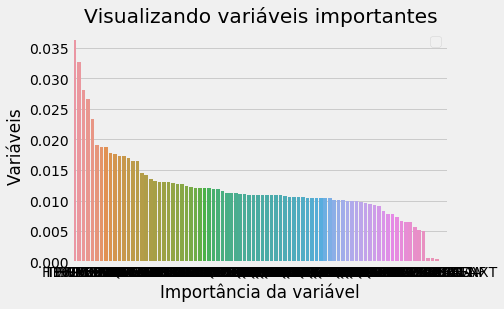

In [241]:
# Creating a bar plot
sns.barplot(x=feature_imp_t1.index, y=feature_imp_t1)

# Add labels to your graph
plt.xlabel('Importância da variável')
plt.ylabel('Variáveis')
plt.title("Visualizando variáveis importantes")
plt.legend()
plt.show()

In [242]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1111  114   18    1]
 [ 235  590  172   17]
 [  32  169  543  115]
 [  13   23  138  594]]
              precision    recall  f1-score   support

           1       0.80      0.89      0.84      1244
           2       0.66      0.58      0.62      1014
           3       0.62      0.63      0.63       859
           4       0.82      0.77      0.79       768

    accuracy                           0.73      3885
   macro avg       0.72      0.72      0.72      3885
weighted avg       0.73      0.73      0.73      3885



## Random Forest para classificar em classes os dados do Dataframe em T-1